### BME 6780 Data Science for Bioengineers
#### Written by Sonny Jones, 11/16/2023
#### Lab 02, Single Value Decomposition of Real Data

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import scipy
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import cv2
import seaborn as sns

In [2]:
# Loading Data Set
valStats = pd.read_csv("val_stats.csv", header = 0)

C:\Users\sonny\AppData\Local\Temp\ipykernel_17756\3910270356.py:2: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  valStats = pd.read_csv("val_stats.csv", header = 0)


### Data Preprocessing

Taking a preliminary look at the data set to determine what types of preprocessing we need to do.

In [3]:
valStats.head()

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64


In [4]:
valStats.describe()

,damage_round,headshot_percent,aces,clutches,flawless,kd_ratio,kills_round,most_kills,score_round,wins,...,gun1_head,gun1_body,gun1_legs,gun2_head,gun2_body,gun2_legs,gun3_head,gun3_body,gun3_legs,gun3_kills
count,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,...,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000
mean,142.815934,23.599013,1.058697,66.347254,39.112258,1.053942,0.758051,28.164371,218.225829,23.784904,...,34.225285,61.354478,4.418334,30.464647,64.986228,4.510925,30.647097,64.857058,4.310313,59.421672
std,16.470485,5.187779,1.492623,53.117926,31.073547,0.157280,0.098120,5.215834,26.331791,18.365853,...,8.106664,7.448574,2.074317,12.500141,12.259972,3.282963,15.905537,15.422508,4.078462,51.289982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.800000,20.000000,0.000000,27.000000,16.000000,0.960000,0.700000,25.000000,202.025000,10.000000,...,29.000000,57.000000,3.000000,24.000000,59.000000,2.000000,20.000000,57.000000,1.000000,23.000000
50%,142.000000,23.300000,1.000000,54.000000,32.000000,1.040000,0.800000,28.000000,216.700000,20.000000,...,34.000000,62.000000,4.000000,30.000000,65.000000,4.000000,28.000000,67.000000,4.000000,46.000000
75%,151.800000,26.800000,2.000000,92.000000,55.000000,1.130000,0.800000,31.000000,232.600000,33.000000,...,39.000000,66.000000,5.000000,37.000000,71.000000,6.000000,40.000000,73.000000,6.000000,81.000000
max,340.600000,83.300000,24.000000,488.000000,316.000000,6.500000,2.000000,58.000000,550.500000,170.000000,...,100.000000,100.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,650.000000


In [5]:
# Looking at data
valStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85674 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

For the class project, we need to validate the patterns that we saw. I am going to try looking at the SVD without any preprocessing steps to determine if the patterns we saw are still valid.

In [6]:
# Interested Columns
cols = ['damage_round', 'headshots', 'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods', 'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills', 'score_round', 'wins', 'win_percent']

In [7]:
# Removing commas from DataFrame
valStats = valStats.replace(',', '', regex = True)

In [8]:
# Replacing dtypes with int
replaceCols = ['headshots', 'kills', 'deaths', 'assists', 'first_bloods']

valStats[replaceCols] = valStats[replaceCols].astype(float)

It looks like there is some discrepency in the name and tag columns as there are missing values. Althought this is not important in our analysis because those are categorical values that we don't need to look at.

There is a large descrepency in the region column. We will take a look at the data and see what is possible happening.

In [9]:
# Looking at Values in region column
valStats.region.values

array([nan, nan, nan, ..., 'LAT', 'LAT', 'LAT'], dtype=object)

There seems to be a large amount of nan values. After checking the original excel file, these should be 'NA'. It seems like the pd.read_csv function is turning 'NA' into nan. We will fill the nan values with the appropriate values.

In [10]:
# Filling nan values with correct 'NA' values
valStats.region = valStats.region.fillna('NA')

In [11]:
# Rechecking information
valStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            85678 non-null  object 
 1   name              85674 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  float64
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  float64
 11  kills             85678 non-null  float64
 12  deaths            85678 non-null  float64
 13  assists           85678 non-null  float64
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

For this project, we will be looking at the stats distribution accross different ranks. 

In [12]:
# Selecting Labels
rankLabels = valStats['rating']
regionLabels = valStats['region']

# Selecting Interested Columns
valStats = valStats[cols]

In [13]:
# Creating colormap for plotting
colors = [(0,1,0), (0,0,0), (1,0,0)]
n_bins = 1000
cmap_name = 'RedBlackGreen'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N = n_bins)

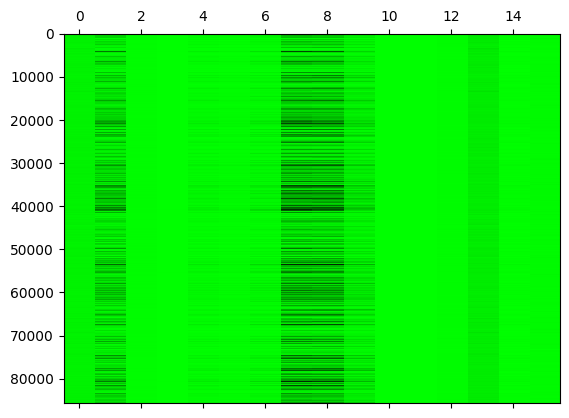

In [14]:
# Showing Data
fig, ax = plt.subplots()
c = ax.matshow(valStats, cmap = cmap)
ax.set_aspect('auto')
plt.show()

In [15]:
# Computing SVD with Sklearn
U, S, V_t = scipy.linalg.svd(valStats, full_matrices = False)
# U, S, V_t = scipy.linalg.svd(valStats_norm, full_matrices = False)

print("Before Transforming S")
print(f"U: {U.shape} S: {S.shape} V_t: {V_t.shape}")

# For Python, sigma is just a single vector full of the diagonal. I will fill in the sigma matrix with the vector as a diagonal and all other dimensions filled with zeros.
S_reshape = np.diag(S)

# Printing shape after transforming
print("Before Transforming S")
print(f"U: {U.shape} S: {S_reshape.shape} V_t: {V_t.shape}")

Before Transforming S
U: (85678, 16) S: (16,) V_t: (16, 16)
Before Transforming S
U: (85678, 16) S: (16, 16) V_t: (16, 16)


### Tests
SVD
- X = U * sigma * V.T

U
- Make sure rows in X = rows in U
- Make sure columns in U <= columns in X
- Make sure all columns are size 1 vectors
- Testing column-wise orthonormal (dot product of itself, U.T * U, diagonal = 1, non-diagonal = 0), identity matrix

Sigma
- Make sure sigma is nonnegative
- Make sure columns in sigma = columns in U
- Make sure sigma is diagonal
- Make sure diagonal is in decreasing order

V.T
- Make sure rows in sigma = rows in V.T
- Make sure rows in V.T = columns in sigma
- Make sure all rows are size 1 vectors
- Testing row-wise orthonormal (dot product of itself, V.T * V, diagonal - 1, non-diagonal = 0), identity matrix 

In [16]:
# SVD Tests
# Test 1: Reverse SVD Test
reverse_svd = np.dot(U, np.dot(S_reshape, V_t))

# Running Test
assert(np.round(np.max(np.absolute(valStats - reverse_svd))) == 0.0), "Reverse SVD not equal to the original data"

# All SVD Tests Passed
print("SVD Passed All Tests")

SVD Passed All Tests


In [17]:
# U Tests
# Test 1: Rows in U equal to Rows in X
assert(U.shape[0] == valStats.shape[0]), "Rows in U are not equal to rows in X"

# Test 2: Num col in U less than or equal to num cols in X
assert(U.shape[1] <= valStats.shape[1]), "Columns in U less than or equal to columns in X"

# Test 3: Column-wise Orthonormal
U_ortho = np.round(np.dot(U.T, U))
assert(np.all(U_ortho.diagonal() == 1)), "U is not orthonormal"

# All U Tests Passed
print("U Passed All Tests")

U Passed All Tests


In [18]:
# Sigma Tests
# Test 1: Sigma is a square matrix
assert(S_reshape.shape[0] == S_reshape.shape[1]), "Sigma is not a square matrix"

# Test 2: Sigma is non-negative
assert(np.min(S_reshape) >= 0), "Sigma contains negative numbers"

# Test 3: Numb of cols in sigma are the same as num cols in U
assert(U.shape[1] == S_reshape.shape[1]), "The number of columns in sigma is not the same as the number of columns in U"

# Test 4: Diagonal is sorted in decreasing order
S = np.diag(S_reshape)
assert(np.all(sorted(S, reverse = True) == S)), "Diagonal of S is not in decreasing order"

# All Sigma Tests Passed
print("Sigma Passed All Tests")

Sigma Passed All Tests


In [19]:
# V Transpose Tests
# Test 1: Num of cols in V_t are equal to num of cols in X
assert(V_t.shape[1] == valStats.shape[1]), "Num of cols in V_t are not equal to num of cols in X"

# Test 2: Num rows in V_t are equal to num cols in sigma
assert(V_t.shape[0] == S_reshape.shape[1]), "Num rows in V_t are not equal to num cols in sigma"

# Test 3: V_t is orthonormal
V_t_ortho = np.round(np.dot(V_t.T, V_t)) 
assert(np.all(V_t_ortho.diagonal() == 1)), "V_t is not orthonormal"

# All Tests Passed
print("V Transpose Passed All Tests")

V Transpose Passed All Tests


### Analyzing Data

Now we can plot the trends that we see. Fist, we will take a look at sigma to see if there are any significant 
trends that we should look at.

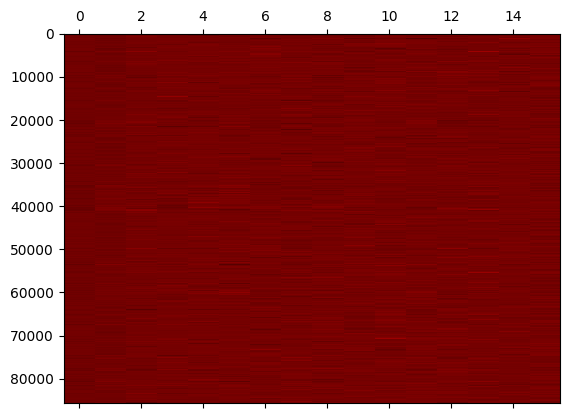

In [20]:
# Plotting U
fig, ax = plt.subplots()
c = ax.matshow(U, cmap = cmap)
ax.set_aspect('auto')
plt.show()

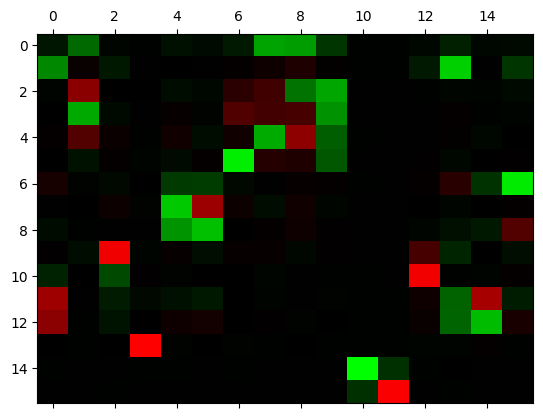

In [21]:
# Plotting V_t
fig, ax = plt.subplots()
c = ax.matshow(V_t, cmap = cmap)
ax.set_aspect('auto')
plt.show()

In [22]:
# Creating colormap for plotting
colors = [(0,1,0), (0,0,0), (1,0,0)]
n_bins = 100
cmap_name = 'RedBlackGreen'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N = n_bins)

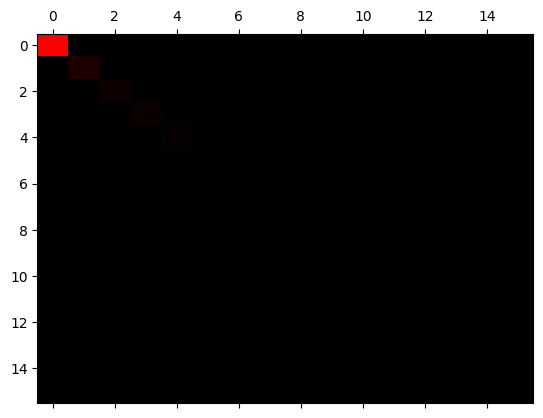

In [23]:
# Plotting Sigma
colors = [(0,0,0), (1,0,0)]
n_bins = 100
cmap_name = 'RedBlack'
s_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N = n_bins)

# Setting 
fig, ax = plt.subplots()
c = ax.matshow(S_reshape, cmap = s_cmap)
ax.set_aspect('auto')
plt.show()

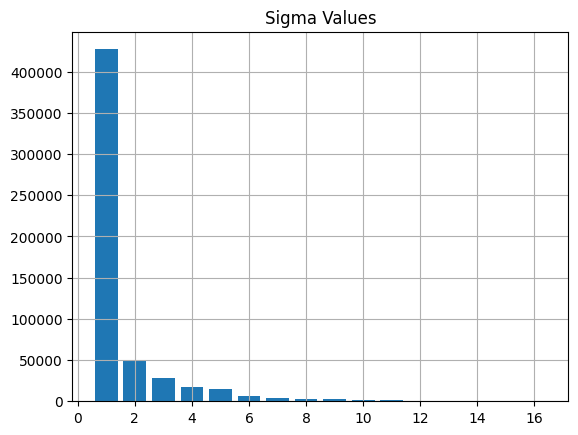

In [24]:
# Plotting Sigma Distribution
plt.bar(np.arange(1, len(S) + 1), S)
plt.title("Sigma Values")
plt.grid()
plt.show()

In [25]:
# Printing sigma values
print(np.diag(S_reshape))

[4.27076410e+05 4.86962697e+04 2.82258453e+04 1.75779730e+04
 1.46535426e+04 6.56350591e+03 3.45387682e+03 2.43788873e+03
 2.21455253e+03 1.20368228e+03 1.07643661e+03 7.28018546e+02
 7.21808918e+02 3.12564998e+02 2.03937555e+01 8.98691719e+00]


I will be looking at 2 different labels, the player rank and the region that the player is from. Next, I will compute the Kruskal Wallace Test for each label to see which column is statistically significant.

### Label 1: Rank

In [26]:
# Label 1: Radiant, Immortal 3, Immortal 2, Immortal 1
mask = np.array(rankLabels)
Label1 = ['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1']
maskLabel1 = (mask == 'Radiant') | (mask == 'Immortal 3') | (mask == 'Immortal 2') | (mask == 'Immortal 1')
URankLabel1 = U[maskLabel1]

# Label 2: Diamond 3, Diamond 2, Diamond 1
maskLabel2 = (mask == 'Diamond 3') | (mask == 'Diamond 2') | (mask == 'Diamond 1')
Label2 = ['Diamond 3', 'Diamond 2', 'Diamond 1'] 
URankLabel2 = U[maskLabel2]

# Label 3: Platinum 3, Platinum 2, Platinum 1
maskLabel3 = (mask == 'Platinum 3') | (mask == 'Platinum 2') | (mask == 'Platinum 1')
Label3 = ['Platinum 3', 'Platinum 2', 'Platinum 1']
URankLabel3 = U[maskLabel3]

# Label 4: Gold 3, Gold 2, Gold 1
maskLabel4 = (mask == 'Gold 3') | (mask == 'Gold 2') | (mask == 'Gold 1')
Label4 = ['Gold 3', 'Gold 2', 'Gold 1']
URankLabel4 = U[maskLabel4]

# Label 5: Silver 3 and below
maskLabel5 = (mask == 'Silver 3') | (mask == 'Silver 2') | (mask == 'Silver 1') | (mask == 'Bronze 3') | (mask == 'Bronze 2') | (mask == 'Bronze 1') | (mask == 'Unrated')
Label5 = ['Silver 3', 'Silver 2', 'Silver 1', 'Bronze 3', 'Bronze 2', 'Bronze 1', 'Unrated']
URankLabel5 = U[maskLabel5]

print(len(URankLabel1), len(URankLabel2), len(URankLabel3), len(URankLabel4), len(URankLabel5))

85574 46 14 18 26


Since it looks like most the data is concentrated in the first label, I am going to split the first label and disregard the other data. For background information, Radiant is the highest rank achievable in this video game. Immortal 3, immortal 2, and immortal 1 are ranks below radiant, respectively.

In [27]:
# Label 1: Radiant
mask = np.array(rankLabels)
Label1 = ['Radiant']
maskLabel1 = (mask == 'Radiant')
URankLabel1 = U[maskLabel1]

# Label 2: Immortal 3
Label2 = ['Immortal 3']
maskLabel2 = (mask == 'Immortal 3')
URankLabel2 = U[maskLabel2]

# Label 3: Immortal 2
Label3 = ['Immortal 2']
maskLabel3 = (mask == 'Immortal 2')
URankLabel3 = U[maskLabel3]

# Label 4: Immortal 1
Label4 = ['Immortal 1']
maskLabel4 = (mask == 'Immortal 1')
URankLabel4 = U[maskLabel4]

In [28]:
# Rank Mask for grabbing region data for these players
rankMaskLabel = maskLabel1 + maskLabel2 + maskLabel3 + maskLabel4

In [29]:
# Sorted U Data
URankMask = np.concatenate([URankLabel1, URankLabel2, URankLabel3, URankLabel4], axis = 0)

In [30]:
# Computing Kruskal Wallace Test along U Cols
rankPValues = []

for i in range(U.shape[1]):
    stat, p = scipy.stats.kruskal(URankLabel1[:,i], URankLabel2[:,i], URankLabel3[:,i], URankLabel4[:,i])
    rankPValues.append(p)

# Printing P-value array
print(rankPValues)

[0.0, 0.0, 4.3357341252187215e-274, 0.0, 2.322458945065505e-280, 8.579473052805082e-18, 0.0, 1.3563556854927521e-48, 1.1146874545712722e-46, 1.233195817951141e-78, 3.324015322290313e-50, 1.603394445917389e-84, 0.0, 4.1050996475137276e-62, 9.403310646490384e-16, 0.8830995074037735]


From the statistical test, it looks like that all columns are statistically significance. We will exam all the columns.

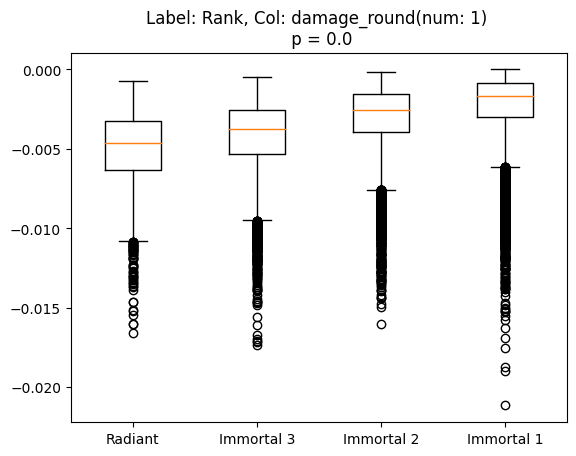

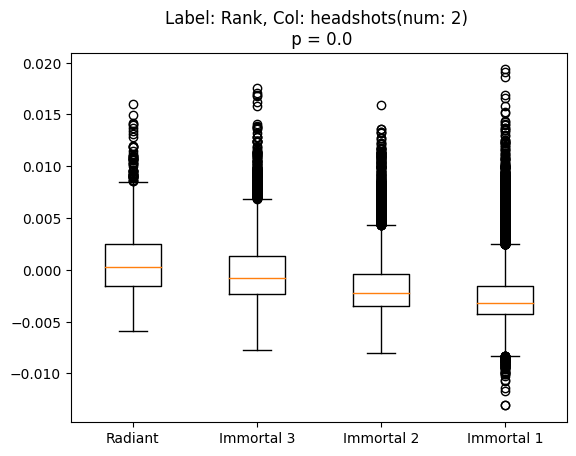

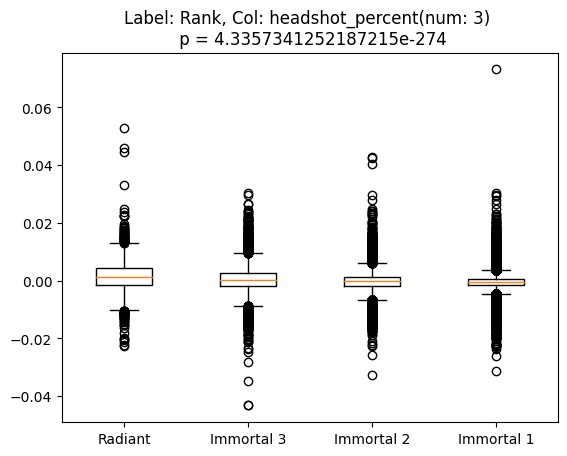

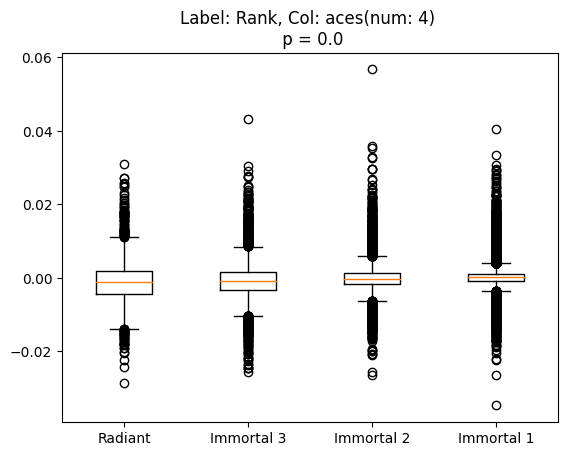

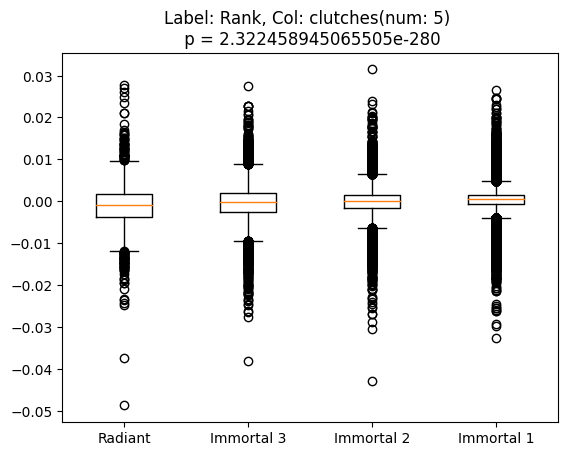

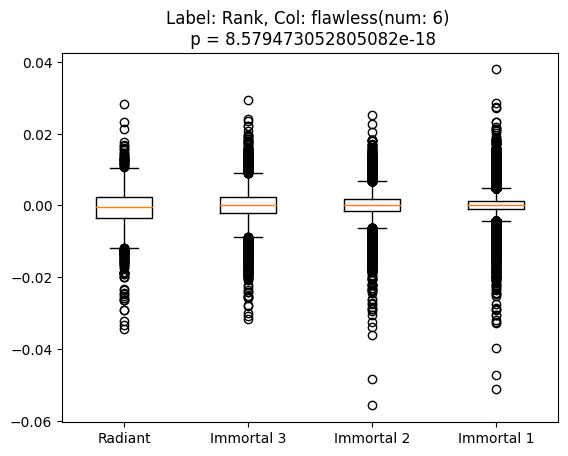

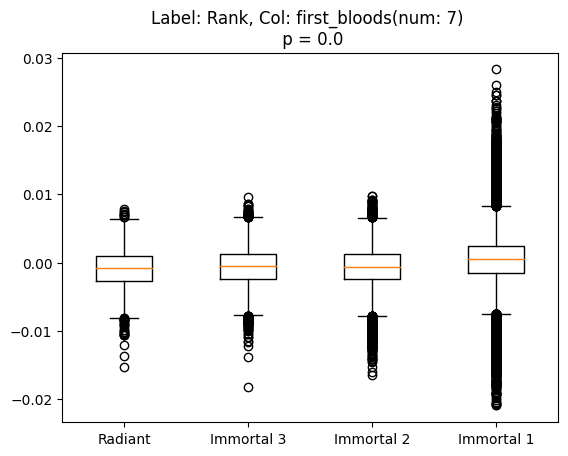

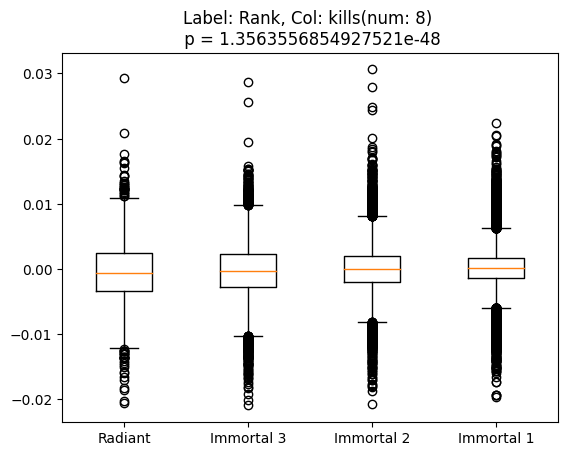

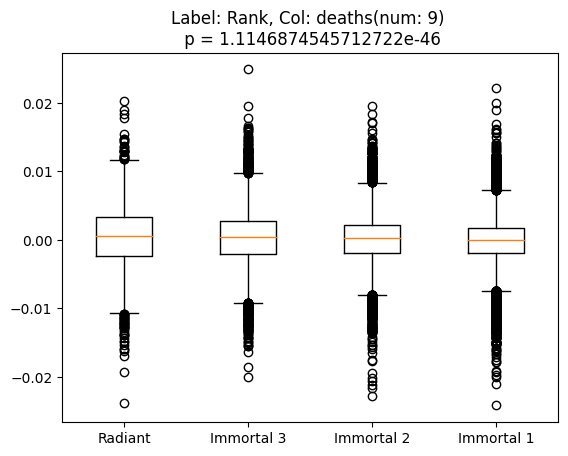

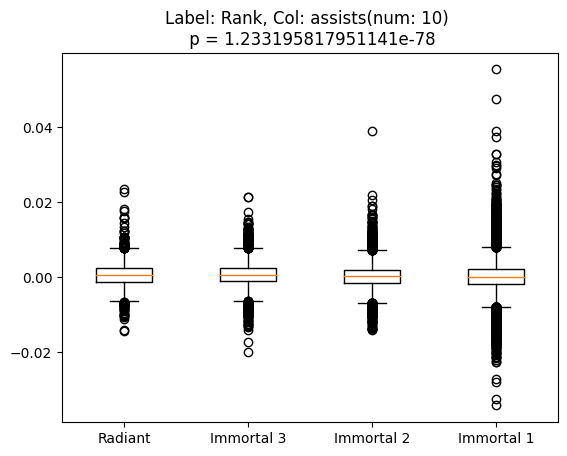

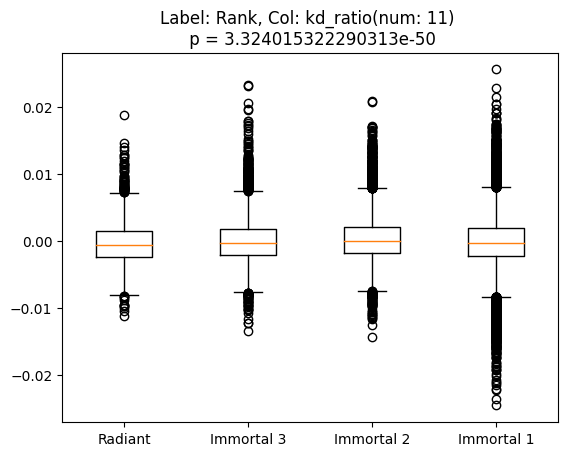

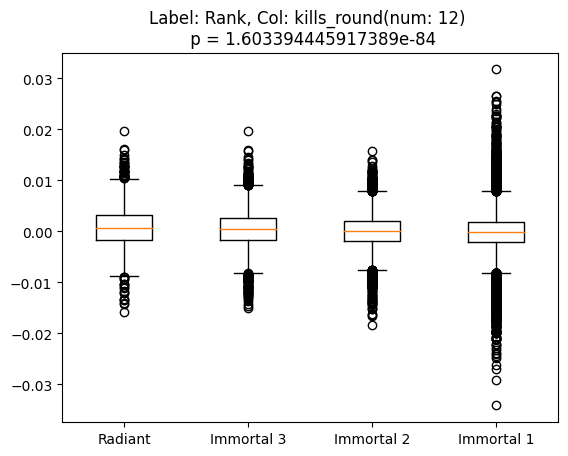

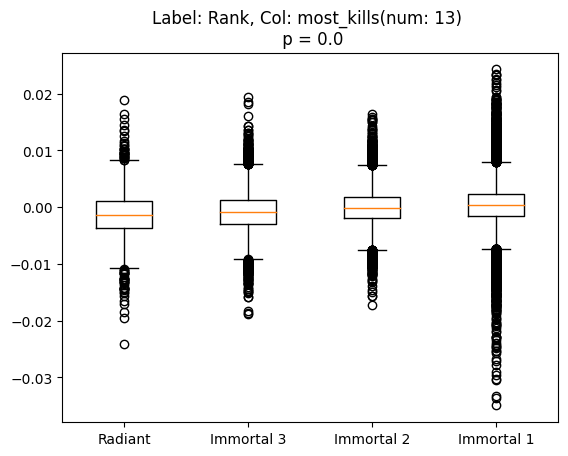

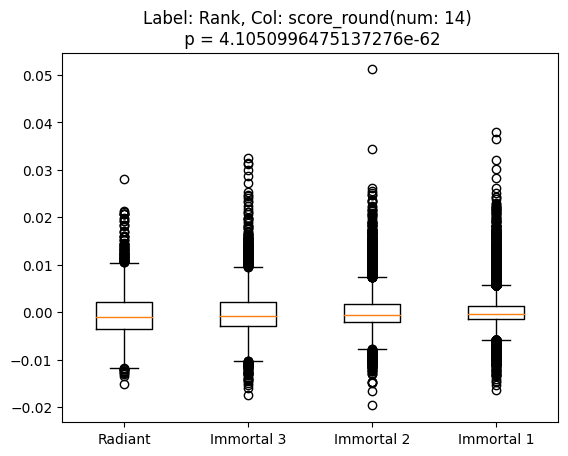

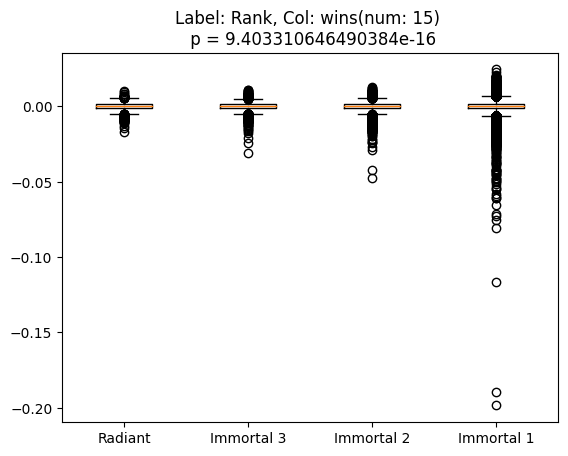

In [31]:
# Plotting all significant columns
rankCols = cols
index = np.where(np.array(rankPValues) < 0.0005)[0]
rankPValues = [rankPValues[i] for i in index]
rankCols = [rankCols[i] for i in index]
boxLabels = ['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1']

for i, data in enumerate(rankCols):
    plt.figure(i + 1)
    data = [URankLabel1[:,i], URankLabel2[:,i], URankLabel3[:,i], URankLabel4[:,i]]
    plt.boxplot(data, labels = boxLabels)
    plt.title(f'Label: Rank, Col: {cols[i]}(num: {index[i] + 1}) \n p = {rankPValues[i]}')

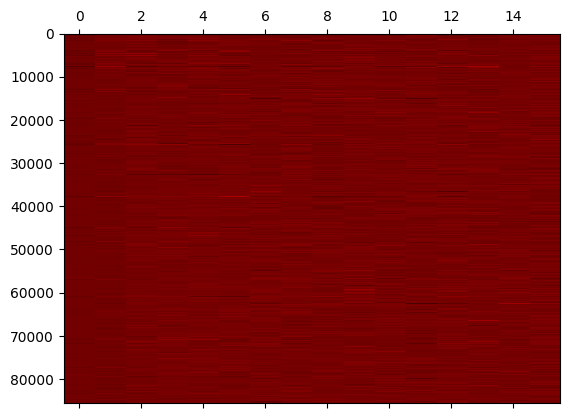

In [32]:
# U Sorted by Rank
fig, ax = plt.subplots()
c = ax.matshow(URankMask, cmap = cmap)
ax.set_aspect('auto')
plt.show()

There seems to be some kind of pattern in columns 1 and 10, damage per round and assists respectively. Lets take a deeper look at those columns by plotting them.

In [33]:
# Column 1: Damage Per Round
rankUData = pd.DataFrame({"Rating" : rankLabels[rankMaskLabel], "damage_round": URankMask[:,0], "assists": URankMask[:,9]})
rankUData = rankUData.sort_values(by = ["damage_round"], ascending = True)

damage_y = np.arange(0, len(rankUData))
rankUData["damage_y"] = damage_y

In [34]:
radiant = rankUData[rankUData['Rating'] == 'Radiant']
immortal3 = rankUData[rankUData['Rating'] == 'Immortal 3']
immortal2 = rankUData[rankUData['Rating'] == 'Immortal 2']
immortal1 = rankUData[rankUData['Rating'] == 'Immortal 1']

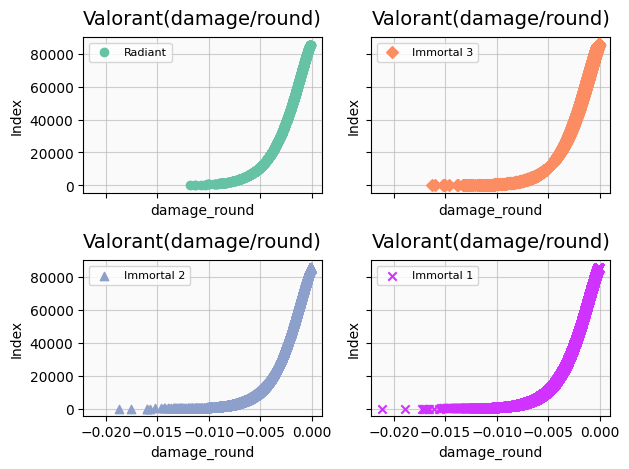

In [35]:
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)

axs[0, 0].scatter(radiant['damage_round'],
            radiant['damage_y'],
            marker='o',
            color='#66c2a5',
            label='Radiant',
            zorder=1000)

axs[0, 1].scatter(immortal3['damage_round'],
            immortal3['damage_y'],
            marker='D',
            color='#fc8d62',
            label='Immortal 3',
            zorder=1000)

axs[1, 0].scatter(immortal2['damage_round'],
            immortal2['damage_y'],
            marker='^',
            color='#8da0cb',
            label='Immortal 2',
            zorder=1000)

axs[1, 1].scatter(immortal1['damage_round'],
            immortal1['damage_y'],
            marker='x',
            color='#d033ff',
            label='Immortal 1',
            zorder=1000)

for ax in axs.flat:
    ax.legend(loc='upper left', scatterpoints=1, fontsize=8)

    ax.set_xlabel('damage_round')
    ax.set_ylabel('Index')
    ax.set_title('Valorant(damage/round)',
                fontsize=14,
                y=1.03)
    ax.set_facecolor('0.98')

    ax.grid(alpha=0.6, zorder=1)

plt.tight_layout()

In [36]:
# Column 10: Assists
rankUData = rankUData.sort_values(by = ['assists'], ascending = True)
assist_y = np.arange(0, len(rankUData))
rankUData["assist_y"] = assist_y

In [37]:
radiant = rankUData[rankUData['Rating'] == 'Radiant']
immortal3 = rankUData[rankUData['Rating'] == 'Immortal 3']
immortal2 = rankUData[rankUData['Rating'] == 'Immortal 2']
immortal1 = rankUData[rankUData['Rating'] == 'Immortal 1']

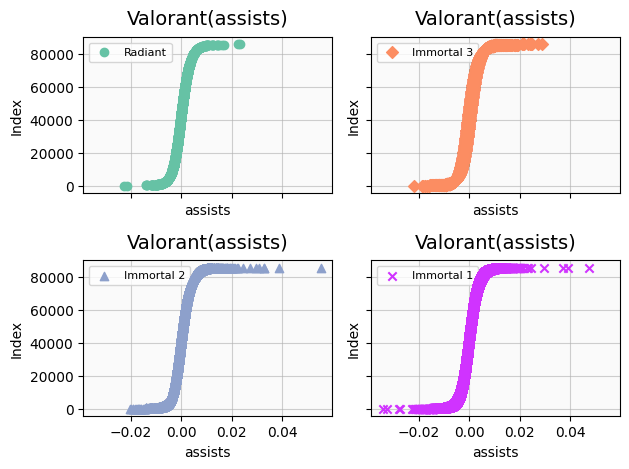

In [38]:
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)

axs[0, 0].scatter(radiant['assists'],
            radiant['assist_y'],
            marker='o',
            color='#66c2a5',
            label='Radiant',
            zorder=1000)

axs[0, 1].scatter(immortal3['assists'],
            immortal3['assist_y'],
            marker='D',
            color='#fc8d62',
            label='Immortal 3',
            zorder=1000)

axs[1, 0].scatter(immortal2['assists'],
            immortal2['assist_y'],
            marker='^',
            color='#8da0cb',
            label='Immortal 2',
            zorder=1000)

axs[1, 1].scatter(immortal1['assists'],
            immortal1['assist_y'],
            marker='x',
            color='#d033ff',
            label='Immortal 1',
            zorder=1000)

for ax in axs.flat:
    ax.legend(loc='upper left', scatterpoints=1, fontsize=8)

    ax.set_xlabel('assists')
    ax.set_ylabel('Index')
    ax.set_title('Valorant(assists)',
                fontsize=14,
                y=1.03)
    ax.set_facecolor('0.98')

    ax.grid(alpha=0.6, zorder=1)

plt.tight_layout()

After removing the preprocessing, it looks like there is a slight distinction between 'radiant' and the other labels. The surve for 'radiants' in both damage per round and assists seem to cut off abruptly before the other 3 labels. We will attempt to do the Hypergeometric P-value on this data, but I assume the same will happen with the other data, as we won't be able compute the p-value due to floating point limit.

In [39]:
# Length of all data
len(rankUData)

85574

In [40]:
# Number of Labels in entire dataset
rankUData['Rating'].value_counts()

Rating
Immortal 1    51315
Immortal 2    20716
Immortal 3    10936
Radiant        2607
Name: count, dtype: int64

In [41]:
# Locating where radiant (damage per round) value is larger than -0.013, estimate from graph
radiants = rankUData[rankUData['Rating'] == 'Radiant']
# Number of Labels above cutoff
print(f"Number of Labels above Cutoff: {len(radiants[radiants['damage_round'] > -0.013])}")
# Number of Total Values above cutoff
print(f"Numver of Total Values Above Cutoff: {len(rankUData) - radiants['damage_y'].min()}")

Number of Labels above Cutoff: 2607
Numver of Total Values Above Cutoff: 85350


In [42]:
# Locating where radiant (assits) value is larger than -0.018, estimate from graph
# Number of Labels above cutoff
print(f"Number of Labels above Cutoff: {len(radiants[radiants['assists'] > -0.018])}")
# Number of Total Values above cutoff
print(f"Numver of Total Values Above Cutoff: {len(rankUData) - radiants['assist_y'].min()}")

Number of Labels above Cutoff: 2605
Numver of Total Values Above Cutoff: 85570


In [43]:
# Creating hypergeometric p-value function from class 
from scipy.special import comb

def PHyper(k, K, m, M):
    numerator = sum([comb(K, i) * comb(M - K, m - i) for i in range(k, m + 1)])
    denominator = comb(M, m)
    if denominator == 0:
        return None
    return numerator / denominator

In [44]:
# Hypergeometric P Value for Damange Per Round Column
print(PHyper(2607, 85350, 2607, 85574))

nan


C:\Users\sonny\AppData\Local\Temp\ipykernel_17756\1757819282.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


In [45]:
# Hypergeometric P Value for Assists Column
print(PHyper(2605, 85570, 2607, 85574))

nan


C:\Users\sonny\AppData\Local\Temp\ipykernel_17756\1757819282.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


### Comparing results to Lab 02
I have saved the previous results and will pull them into this one for comparison. It looks like the patterns from the previous analysis held steady compared to an analysis without preprocessing. It looks like the patterns found without preprocessing have higher sigma values in comparison with the preprocessed values, but that makes sense since all the values are on different scales. For the sake of complexity, I am going to use the preprocessing method as I believe that might be best to create a method of prediction since no huge numbers will affects the weights on my model.

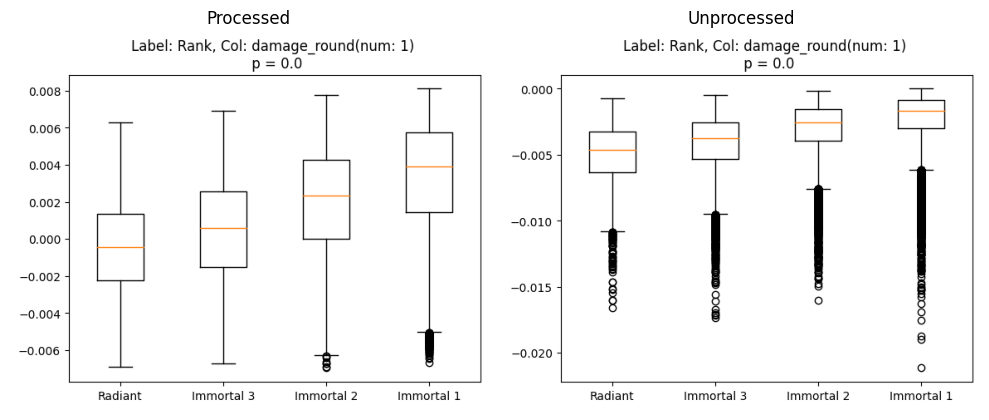

In [46]:
# Column 1: Damage Per Round 
damageRound = cv2.imread('damage_round.png')
damageRound_rgb = cv2.cvtColor(damageRound, cv2.COLOR_BGR2RGB)

damageRound1 = cv2.imread('damage_round(Unprocessed).png')
damageRound1_rgb = cv2.cvtColor(damageRound1, cv2.COLOR_BGR2RGB)

# Creating 2 subplots
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# First Item
axes[0].imshow(damageRound_rgb)
axes[0].set_title('Processed')
axes[0].axis('off')

# Second Item
axes[1].imshow(damageRound1_rgb)
axes[1].set_title('Unprocessed')
axes[1].axis('off')

# Showing image
plt.tight_layout()
plt.show()

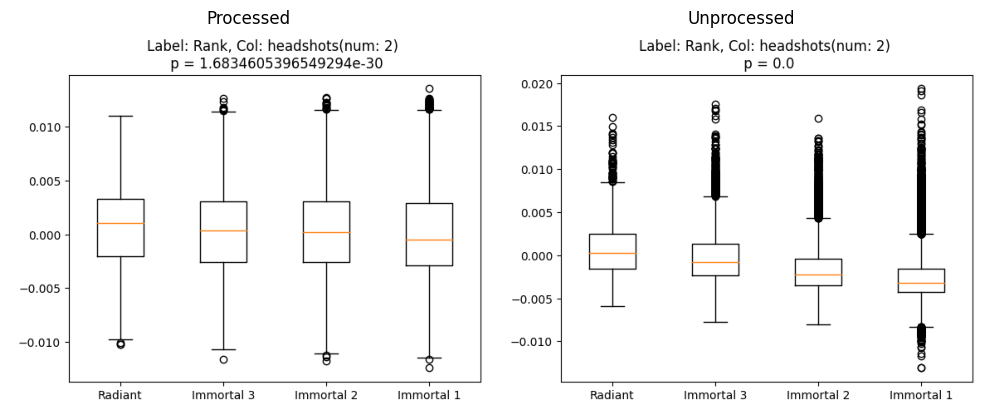

In [47]:
# Column 2: Headshots
headshots = cv2.imread('headshots.png')
headshots_rgb = cv2.cvtColor(headshots, cv2.COLOR_BGR2RGB)

headshots1 = cv2.imread('headshots(Unprocessed).png')
headshots1_rgb = cv2.cvtColor(headshots1, cv2.COLOR_BGR2RGB)

# Creating 2 subplots
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# First Item
axes[0].imshow(headshots_rgb)
axes[0].set_title('Processed')
axes[0].axis('off')

# Second Item
axes[1].imshow(headshots1_rgb)
axes[1].set_title('Unprocessed')
axes[1].axis('off')

# Showing image
plt.tight_layout()
plt.show()

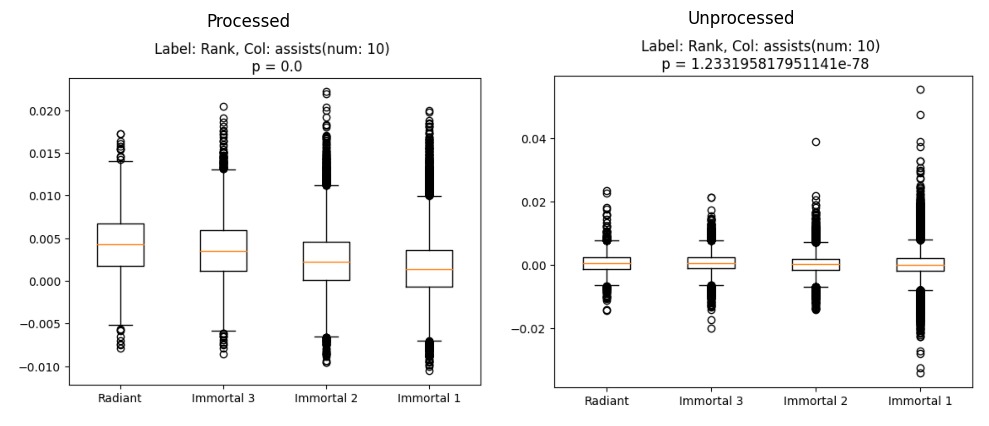

In [48]:
# Column 10: Assists 
assists = cv2.imread('assists.png')
assists_rgb = cv2.cvtColor(assists, cv2.COLOR_BGR2RGB)

assists1 = cv2.imread('assists(Unprocessed).png')
assists1_rgb = cv2.cvtColor(assists1, cv2.COLOR_BGR2RGB)

# Creating 2 subplots
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# First Item
axes[0].imshow(assists_rgb)
axes[0].set_title('Processed')
axes[0].axis('off')

# Second Item
axes[1].imshow(assists1_rgb)
axes[1].set_title('Unprocessed')
axes[1].axis('off')

# Showing image
plt.tight_layout()
plt.show()

For the most part, the patterns are the same. Damage Per Round decreases, Headshots increase, and Assists increase when you increase rank from Immortal 1 to Radiant. Now with these trends formalized, I am going to try to create a predictor that is able to predict the rank of an individual given the stats from the player. When we do this process, we are able to extract the most important features the play a role in generating the predictions. This is additional validation that the specific features (damage per round, assists, and possible headshots) play a role in determining player rank. We'll first try training the model with the current data. Then we will try again with the preprocessed data.

In [49]:
# Importing Modules
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Setting random seed for reproducibility
random_state = 2023

In [50]:
features = pd.DataFrame(URankMask, columns = cols)
features.head()

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent
0,-0.005633,0.001903,-0.004271,-0.010105,-0.006393,-0.004646,-0.001550,-0.003943,0.001280,0.002514,-0.001786,0.003705,-0.007400,-0.006143,0.000409,-0.002502
1,-0.005188,-0.000218,0.010090,0.010788,-0.009064,-0.002366,-0.005786,0.003077,-0.007922,0.005245,-0.005727,-0.000480,-0.005497,-0.005652,0.003204,0.004536
2,-0.004122,-0.000459,0.002460,0.003412,0.002720,-0.003817,-0.005120,-0.002860,-0.002850,0.001524,0.008097,0.004237,-0.004178,0.002653,-0.000035,0.001123
3,-0.003888,-0.002152,0.011825,-0.001599,-0.001946,-0.006696,-0.001581,-0.000816,-0.000448,0.004554,0.000391,-0.000933,-0.001761,-0.001656,-0.001921,0.001844
4,-0.003133,-0.001837,0.001823,0.002179,-0.000538,0.000442,-0.001877,-0.000150,0.004108,0.000052,-0.000862,0.003852,-0.005565,0.001834,0.001332,-0.000483


In [51]:
targets = pd.DataFrame(rankLabels[rankMaskLabel])
targets.head()

,rating
0,Radiant
1,Radiant
2,Radiant
3,Radiant
4,Radiant


In [52]:
# Checking length of features and vectors
assert(len(targets) == len(features))

In [53]:
# Turning Categorical Target Values to Numeric Labels
lb = LabelEncoder()
targets['rating'] = lb.fit_transform(targets['rating'])

In [54]:
# Checking Label Output
targets.value_counts()

rating
0         51315
1         20716
2         10936
3          2607
Name: count, dtype: int64

In [55]:
# Dividing Training and Validation Data
featureTrain, featureTest, targetsTrain, targetsTest = train_test_split(features, targets, train_size = 0.9, random_state= random_state)

In [56]:
# Training NN
clf = MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (64, 32), random_state = random_state, max_iter = 1000)

# Training Model
clf.fit(featureTrain, targetsTrain.values.ravel())

# Training Accuracy
print(f"Training Accuracy: {clf.score(featureTrain, targetsTrain)}")

Training Accuracy: 0.6015113742598941


In [57]:
# Prediction Accuracy
results = clf.predict(featureTest)
targetNames = ['Immortal 1', 'Immortal 2', 'Immortal 3', 'Radiant']

# Printing Classification Report
print(classification_report(targetsTest, results, target_names = targetNames))

              precision    recall  f1-score   support

  Immortal 1       0.60      1.00      0.75      5089
  Immortal 2       0.38      0.01      0.03      2107
  Immortal 3       0.00      0.00      0.00      1108
     Radiant       0.00      0.00      0.00       254

    accuracy                           0.60      8558
   macro avg       0.25      0.25      0.19      8558
weighted avg       0.45      0.60      0.45      8558



c:\Users\sonny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sonny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sonny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [58]:
# Feature Importance
weights = clf.coefs_

# Calculating Feature Importance
featureImp = np.sum(np.abs(weights[0]), axis = 1)

# Printing
for index, col in enumerate(cols):
    print(f"Column Name: {col}, Importance: {featureImp[index]}")

Column Name: damage_round, Importance: 94.68000866020364
Column Name: headshots, Importance: 55.098371156066506
Column Name: headshot_percent, Importance: 60.08317294971641
Column Name: aces, Importance: 27.306257417957006
Column Name: clutches, Importance: 34.40112893217926
Column Name: flawless, Importance: 9.098437701511473
Column Name: first_bloods, Importance: 65.96999629844956
Column Name: kills, Importance: 46.98701158432601
Column Name: deaths, Importance: 50.90235152007493
Column Name: assists, Importance: 25.88651498697938
Column Name: kd_ratio, Importance: 14.907855015895523
Column Name: kills_round, Importance: 36.16796742761598
Column Name: most_kills, Importance: 43.47339231699101
Column Name: score_round, Importance: 12.932527251793188
Column Name: wins, Importance: 16.563455110543302
Column Name: win_percent, Importance: 12.247622309258183


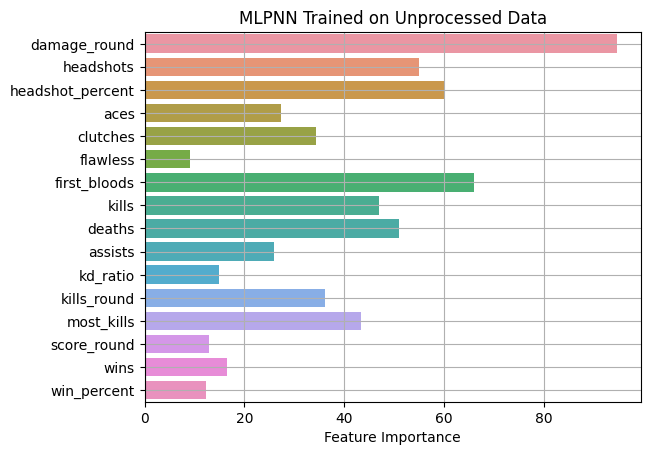

In [59]:
# Plotting
ax = sns.barplot(x = featureImp, y = cols, orient = "h")
ax.set(xlabel = "Feature Importance", title = "MLPNN Trained on Unprocessed Data")
plt.grid()
plt.show()

Now lets try it with the processed data.

In [60]:
# Loading Processed Data
data = np.load('UrankMask(Processed).npy')
labels = np.load('rankMaskLabel(Processed).npy', allow_pickle = True)

In [61]:
features1 = pd.DataFrame(data, columns = cols)
features1.head()

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent
0,-0.001094,0.004522,0.004104,0.003629,-0.000356,0.002757,0.004482,0.001064,-0.000095,0.009765,-0.001470,0.002107,-0.007456,0.003162,0.002682,0.000021
1,-0.004241,0.004301,0.000249,0.004548,0.008012,0.007392,0.006560,0.003123,0.004590,0.016356,0.002870,0.003567,0.006465,0.008478,-0.003662,0.014942
2,-0.001784,0.001088,-0.002559,-0.000677,-0.009098,0.003249,-0.008709,-0.005978,-0.010678,0.007398,-0.004073,-0.004357,-0.002807,0.007091,0.002014,0.005917
3,0.001035,0.000983,-0.007237,0.001289,0.001393,0.000552,-0.004948,-0.005803,-0.004790,0.004204,-0.002703,-0.000783,-0.003977,-0.001673,-0.002454,0.006135
4,-0.002853,-0.005862,-0.008422,0.001835,0.001029,0.005453,-0.004996,-0.001164,-0.005274,-0.000293,-0.001821,0.018575,0.003152,0.004572,-0.001456,0.002401


In [62]:
targets1 = pd.DataFrame(labels, columns = ['rating'])
targets1.head()

,rating
0,Radiant
1,Radiant
2,Radiant
3,Radiant
4,Radiant


In [63]:
# Checking length of features and vectors
assert(len(targets) == len(features))

In [64]:
# Turning Categorical Target Values to Numeric Labels
lb = LabelEncoder()
targets['rating'] = lb.fit_transform(targets['rating'])

In [65]:
# Checking Label Output
targets.value_counts()

rating
0         51315
1         20716
2         10936
3          2607
Name: count, dtype: int64

In [66]:
# Dividing Training and Validation Data
featureTrain, featureTest, targetsTrain, targetsTest = train_test_split(features, targets, train_size = 0.9, random_state= random_state)

In [67]:
# Training NN
clf = MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (63, 32), random_state = random_state, max_iter = 1000)

# Training Model
clf.fit(featureTrain, targetsTrain.values.ravel())

# Training Accuracy
print(f"Training Accuracy: {clf.score(featureTrain, targetsTrain)}")

Training Accuracy: 0.6010049859769399


In [68]:
# Prediction Accuracy
results = clf.predict(featureTest)
targetNames = ['Immortal 1', 'Immortal 2', 'Immortal 3', 'Radiant']

# Printing Classification Report
print(classification_report(targetsTest, results, target_names = targetNames))

              precision    recall  f1-score   support

  Immortal 1       0.60      1.00      0.75      5089
  Immortal 2       0.45      0.01      0.02      2107
  Immortal 3       0.00      0.00      0.00      1108
     Radiant       0.00      0.00      0.00       254

    accuracy                           0.60      8558
   macro avg       0.26      0.25      0.19      8558
weighted avg       0.47      0.60      0.45      8558



c:\Users\sonny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sonny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sonny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [69]:
# Feature Importance
weights = clf.coefs_

# Calculating Feature Importance
featureImp = np.sum(np.abs(weights[0]), axis = 1)

# Printing
for index, col in enumerate(cols):
    print(f"Column Name: {col}, Importance: {featureImp[index]}")

Column Name: damage_round, Importance: 60.118770574396486
Column Name: headshots, Importance: 42.18811554369046
Column Name: headshot_percent, Importance: 40.469868452920025
Column Name: aces, Importance: 24.458107978790643
Column Name: clutches, Importance: 24.069522731361293
Column Name: flawless, Importance: 8.100244636039793
Column Name: first_bloods, Importance: 44.65406039942153
Column Name: kills, Importance: 42.84467040687503
Column Name: deaths, Importance: 43.6243587859344
Column Name: assists, Importance: 25.188649046945653
Column Name: kd_ratio, Importance: 15.596192656493367
Column Name: kills_round, Importance: 18.791524546848557
Column Name: most_kills, Importance: 26.630887589936123
Column Name: score_round, Importance: 8.39243832551646
Column Name: wins, Importance: 13.239224097965879
Column Name: win_percent, Importance: 8.002138461790198


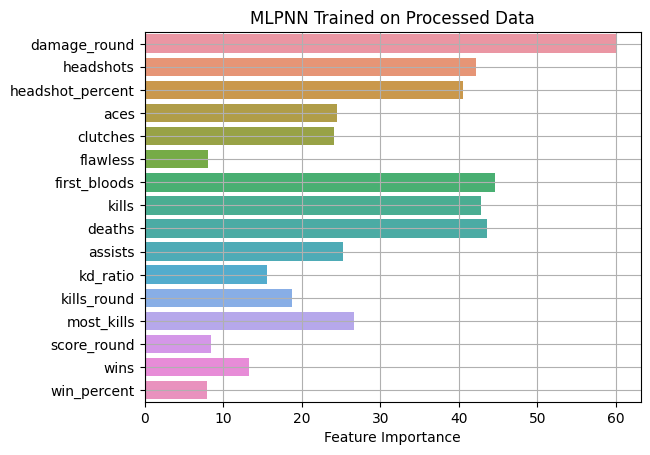

In [71]:
# Plotting
ax = sns.barplot(x = featureImp, y = cols, orient = "h")
ax.set(xlabel = "Feature Importance", title = "MLPNN Trained on Processed Data")
plt.grid()
plt.show()